# Geothermal Datathon 2021
---

<img src="../figures/the_roaring_kitties_logo.png" width="200" align="center">

Team members:
- **Ricardo Lara**
- **Artur Davletshin**
- **Aigul Akberova**
- **Sercan Gul**
- **Hakki Aydin**
- **Jose Hernandez**


---

### Import Modules

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import lasio 
import os
import missingno as msno

In [2]:
DV = pd.read_csv('tidy data/Duvernay_Temperatures.csv')
EV = pd.read_csv('tidy data/Eaglebine_Temperatures.csv')

DV_UWIs = list(DV.UWI)
EB_UWIs = list(EV.UWI.astype(str))

# 1 Production Data

In [3]:
EBp = pd.read_excel("../data/Eaglebine/SPE Eaglebine production summary April 20 2021.xlsx")
DVp = pd.read_excel("../data/Duvernay/SPE Duvernay production summary April 20 2021.xlsx")

In [4]:
eb_col_names = ['UWI',
                'MD, ft',
                'TVD, ft',
                'spud date',
                'completion date',
                'first production month',
                'elevation',
                'oil total cum, bbl',
                'gas total cum, mcf',
                'water total cum, bbl',
                'gor total average',
                'plug date',
                'TD date',
                'drilling days',
                'last production month',
                'gas maximum, mcf',
                'gas maximum date',
                'oil maximum, bbl',
                'oil maximum date',
                'water maximum, bbl',
                'water maximum date',
                'liquid injection cum, bbl',
                'gas injection cum, mcvf',
                ]
EBp.columns = eb_col_names

In [5]:
dv_col_names = ['UWI',
                'MD, ft',
                'TVD, ft',
                'spud date',
                'completion date',
                'first production month',
                'elevation',
                'oil total cum, bbl',
                'gas total cum, mcf',
                'water total cum, bbl',
                'gor total average',
                'plug date',
                'firs production date',
                'elevation drill floor, ft',
                'elevation ground, ft',
                'elevation kelly bushing, ft',
                'last production month',
                'gas maximum, mcf',
                'gas maximum date',
                'oil maximum, bbl',
                'oil maximum date',
                'water maximum, bbl',
                'water maximum date',
                'yield total average',
                ]

DVp.columns = dv_col_names

In [6]:
EBp['status'] = 'plugged'
EBp.loc[EBp['plug date'].isnull(), 'status'] = 'producing'

DVp['status'] = 'plugged'
DVp.loc[DVp['plug date'].isnull(), 'status'] = 'producing'

# 2 Eaglebine Mud Weigth

In [7]:
EB_mw = pd.read_excel("../data/Eaglebine/Eaglebine mud weight SPE April 21 2021.xlsx")


In [8]:
EB_mw['TD, m'] = EB_mw['TD'] / 3.28084
EB_mw['MW at Depth(KB), m'] = EB_mw['MW@Depth(KB)'] / 3.28084
EB_mw['KB, m'] = EB_mw['KB'] / 3.28084

In [9]:
EB_mw.head()

,UWI,TD,KB,Mud Wt,MW@Depth(KB),"TD, m","MW at Depth(KB), m","KB, m"
0,42013301410000,19629,327.5,9.3,4404,5982.919009,1342.339157,99.821997
1,42013301410000,19629,327.5,11.9,12550,5982.919009,3825.239878,99.821997
2,42013301410000,19629,327.5,11.2,12650,5982.919009,3855.719877,99.821997
3,42013301410000,19629,327.5,11.9,12650,5982.919009,3855.719877,99.821997
4,42013301410000,19629,327.5,11.9,14390,5982.919009,4386.071860,99.821997


# 3 Eaglebine Casing Production

In [10]:
EB_case= pd.read_excel("../data/Eaglebine/EagleBine Casing production summary for SPE April21 2020.xlsx")
EB_case['UWI'] = EB_case['UWI'].astype('str')
EB_case['UWI'] = EB_case['UWI'] + '0000'
EB_case.head()

,UWI,MinCasingSize\,spuddate,completiondate,cumoil,cumgas,cumwater
0,42013301930000,5.500,NaN,1972-07-22,6140.000,8702967.000,1002330.677
1,42013302760000,4.500,NaN,1975-07-28,1929.332,7.992,0.000
2,42013305480000,2.875,1977-01-23,1977-02-24,0.000,10067.000,0.000
3,42013311740000,2.375,1981-04-28,1981-06-11,3697.000,5679789.000,37521.613
4,42013313140000,2.375,NaN,1982-04-20,69.000,2.000,0.000


In [11]:
EB_case.rename(columns={'MinCasingSize\\':'Min casing size, in'}, inplace=True)

# 3 Headers

In [12]:
EB_head = pd.read_excel("../data/Eaglebine/Eaglebine well headers SPE April 21 2021.xlsx")
DV_head = pd.read_excel("../data/Duvernay/Duvernay well headers SPE April 21 2021 .xlsx")


In [13]:
EB_head.rename(columns={'displayapi':'UWI'}, inplace=True)
DV_head.rename(columns={'UWI ':'UWI'}, inplace=True)

In [14]:
columns = ['UWI',
            'SurfaceLatitude_NAD27',
            'SurfaceLongitude_NAD27',
            'BottomLatitude_NAD27',
            'BottomLongitude_NAD27',
            ]

In [15]:
DV_head2 = DV_head[columns]

In [16]:
EB_head2 = EB_head[columns]

# 4 Merge and export data

In [17]:
len(DV_UWIs)

512

In [18]:
prod_columns = ['UWI',
                'oil total cum, bbl',
                'gas total cum, mcf',
                'water total cum, bbl',
                'gor total average',
                'gas maximum, mcf',
                'oil maximum, bbl',
                'water maximum, bbl',
                'yield total average',
                'status']

DV2 = DV_head2.merge(DVp[prod_columns], on='UWI', how='left' )
DV2.head()

,UWI,SurfaceLatitude_NAD27,SurfaceLongitude_NAD27,BottomLatitude_NAD27,BottomLongitude_NAD27,"oil total cum, bbl","gas total cum, mcf","water total cum, bbl",gor total average,"gas maximum, mcf","oil maximum, bbl","water maximum, bbl",yield total average,status
0,100072507623W500,55.613640,-117.423800,55.613640,-117.423800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,producing
1,100062007823W500,55.770872,-117.537674,55.770872,-117.537674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,producing
2,100052107723W500,55.683723,-117.516168,55.683723,-117.516168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,producing
3,100061307518W500,55.494600,-116.653606,55.494600,-116.653606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,producing
4,100070907618W500,55.566965,-116.726243,55.566965,-116.726243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,producing


<AxesSubplot:>

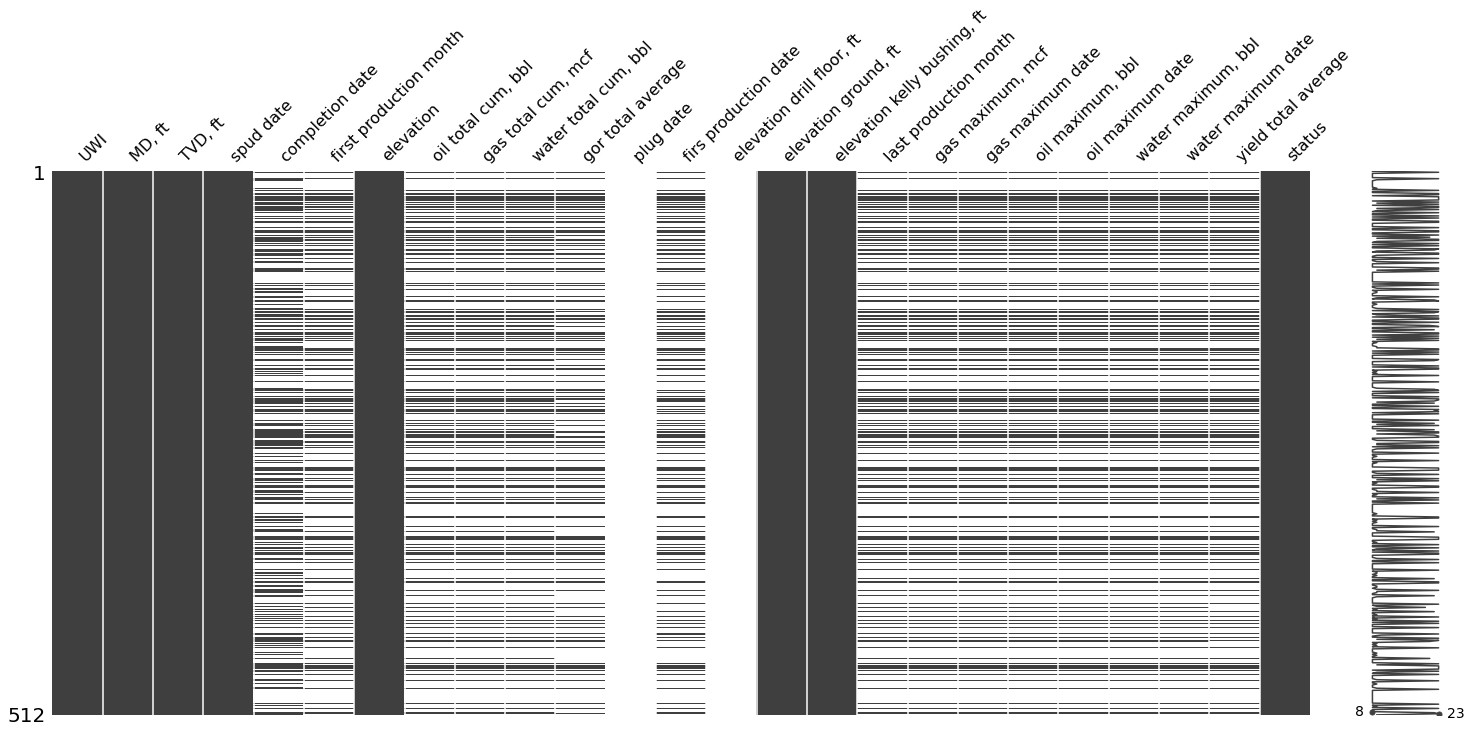

In [19]:
msno.matrix(DVp)

<AxesSubplot:>

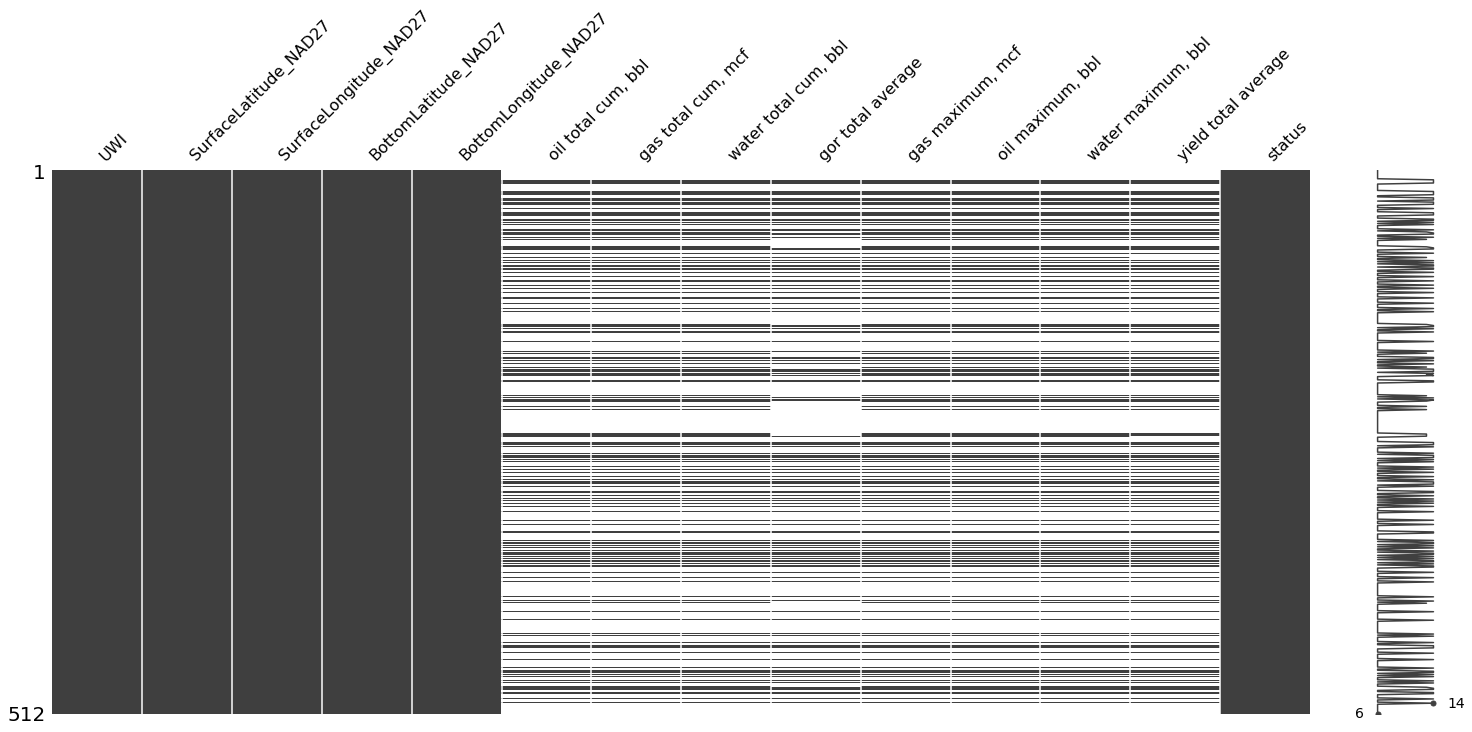

In [20]:
msno.matrix(DV2)

## Eaglebine

In [21]:
EBp.sort_values('last production month', inplace=True, ascending=False)
EBp.head()

,UWI,"MD, ft","TVD, ft",spud date,completion date,first production month,elevation,"oil total cum, bbl","gas total cum, mcf","water total cum, bbl",...,last production month,"gas maximum, mcf",gas maximum date,"oil maximum, bbl",oil maximum date,"water maximum, bbl",water maximum date,"liquid injection cum, bbl","gas injection cum, mcvf",status
1,42013301930000,NaN,10775.0,NaT,1972-07-22,1972-07-01,363 GL,6140.00,8702967.000,1002330.677,...,2020-12-01,98093.0,1972-10-01,271.0,2010-03-01,11771.160,1972-10-01,NaN,NaN,producing
124,42051315580000,NaN,8526.0,NaT,1981-05-27,1982-11-01,268 GL,158063.12,475454.905,123063.786,...,2020-12-01,9544.0,1982-11-01,3654.0,1982-11-01,3168.018,1982-11-01,NaN,NaN,producing
353,42293309280000,NaN,9719.0,NaT,1990-04-27,1990-05-01,396 GL,9707.00,2104481.000,89500.381,...,2020-12-01,43202.0,1990-06-01,569.0,1990-06-01,4066.722,1998-04-01,NaN,NaN,producing
212,42163307280000,NaN,6325.0,NaT,1977-05-05,1977-07-01,NaN,12901.00,1918349.000,11935.108,...,2020-12-01,16885.0,1977-08-01,330.0,1977-07-01,118.195,1977-08-01,NaN,NaN,producing
354,42293312300000,NaN,14165.0,1997-10-12,1998-02-27,1998-04-01,376 GL,1.00,5412927.000,116469.242,...,2020-12-01,457493.0,1998-04-01,1.0,2003-05-01,11368.028,2001-09-01,NaN,NaN,producing


In [22]:
EBp[EBp.duplicated(subset='UWI', keep='first')]

,UWI,"MD, ft","TVD, ft",spud date,completion date,first production month,elevation,"oil total cum, bbl","gas total cum, mcf","water total cum, bbl",...,last production month,"gas maximum, mcf",gas maximum date,"oil maximum, bbl",oil maximum date,"water maximum, bbl",water maximum date,"liquid injection cum, bbl","gas injection cum, mcvf",status
113,42051310600000,NaN,9321.0,1980-11-13,1980-11-26,1989-01-01,324 GL,1077.0,276646.0,0.000,...,2019-08-01,1446.0,1990-08-01,151.0,1990-08-01,0.00,1989-01-01,NaN,NaN,producing
92,42051308540000,NaN,8395.0,1980-07-29,1980-09-24,1980-11-01,313 GL,46654.5,560835.0,0.000,...,2018-08-01,9245.0,1987-06-01,1781.0,1999-09-01,0.00,1980-11-01,NaN,NaN,producing
286,42287309240000,NaN,7754.0,NaT,1981-05-08,1988-04-01,453 GL,17164.0,74.0,0.000,...,2018-06-01,1.0,1988-04-01,312.0,1997-08-01,0.00,1988-04-01,NaN,NaN,producing
348,42293304520000,NaN,14500.0,1979-04-22,1979-08-21,1979-10-01,424 GL,640.0,726589.0,36816.870,...,2011-11-01,31644.0,2011-03-01,85.0,2007-07-01,6011.83,2011-04-01,NaN,NaN,producing
340,42289313250000,NaN,9700.0,2000-04-28,2000-05-20,2000-06-01,501 GL,1625.0,134795.0,9453.584,...,2011-02-01,9132.0,2000-07-01,96.0,2000-07-01,913.20,2000-07-01,NaN,NaN,producing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,42479352780000,NaN,10000.0,1991-07-21,1992-12-30,NaT,611 GL,NaN,NaN,NaN,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,840655.0,252998.0,plugged
399,42493302300000,NaN,7120.0,NaT,1986-05-01,NaT,NaN,NaN,NaN,NaN,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaN,producing
400,42493302300000,NaN,7120.0,NaT,1986-05-01,NaT,NaN,NaN,NaN,NaN,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaN,producing
407,42493310750000,NaN,6400.0,1982-03-19,1982-05-07,NaT,416 GL,NaN,NaN,NaN,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,37500.0,0.0,plugged


In [23]:
EBp.drop_duplicates(subset='UWI', keep='first', inplace=True, ignore_index=True)

In [24]:
EBp['status'] = 'plugged'
EBp.loc[EBp['plug date'].isnull(), 'status'] = 'producing'

In [25]:
EBp

,UWI,"MD, ft","TVD, ft",spud date,completion date,first production month,elevation,"oil total cum, bbl","gas total cum, mcf","water total cum, bbl",...,last production month,"gas maximum, mcf",gas maximum date,"oil maximum, bbl",oil maximum date,"water maximum, bbl",water maximum date,"liquid injection cum, bbl","gas injection cum, mcvf",status
0,42013301930000,NaN,10775.0,NaT,1972-07-22,1972-07-01,363 GL,6140.00,8702967.000,1002330.677,...,2020-12-01,98093.0,1972-10-01,271.0,2010-03-01,11771.160,1972-10-01,NaN,NaN,producing
1,42051315580000,NaN,8526.0,NaT,1981-05-27,1982-11-01,268 GL,158063.12,475454.905,123063.786,...,2020-12-01,9544.0,1982-11-01,3654.0,1982-11-01,3168.018,1982-11-01,NaN,NaN,producing
2,42293309280000,NaN,9719.0,NaT,1990-04-27,1990-05-01,396 GL,9707.00,2104481.000,89500.381,...,2020-12-01,43202.0,1990-06-01,569.0,1990-06-01,4066.722,1998-04-01,NaN,NaN,producing
3,42163307280000,NaN,6325.0,NaT,1977-05-05,1977-07-01,NaN,12901.00,1918349.000,11935.108,...,2020-12-01,16885.0,1977-08-01,330.0,1977-07-01,118.195,1977-08-01,NaN,NaN,producing
4,42293312300000,NaN,14165.0,1997-10-12,1998-02-27,1998-04-01,376 GL,1.00,5412927.000,116469.242,...,2020-12-01,457493.0,1998-04-01,1.0,2003-05-01,11368.028,2001-09-01,NaN,NaN,producing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,42493312560000,NaN,5800.0,2000-08-21,2000-08-30,NaT,509 GL,NaN,NaN,NaN,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,55897.0,0.0,plugged
304,42493322270000,NaN,NaN,1990-09-12,1990-09-23,NaT,NaN,NaN,NaN,NaN,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaN,plugged
305,42507007550000,NaN,NaN,NaT,1968-07-04,NaT,NaN,NaN,NaN,NaN,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaN,producing
306,42507312960000,NaN,NaN,NaT,1980-02-05,NaT,808 GL,NaN,NaN,NaN,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaN,plugged


In [26]:
prod_columns = ['UWI',
                'oil total cum, bbl',
                'gas total cum, mcf',
                'water total cum, bbl',
                'gor total average',
                'gas maximum, mcf',
                'oil maximum, bbl',
                'water maximum, bbl',
                'status']

EB2 = EB_head2.merge(EBp[prod_columns], on='UWI', how='left' )
EB2.head()

,UWI,SurfaceLatitude_NAD27,SurfaceLongitude_NAD27,BottomLatitude_NAD27,BottomLongitude_NAD27,"oil total cum, bbl","gas total cum, mcf","water total cum, bbl",gor total average,"gas maximum, mcf","oil maximum, bbl","water maximum, bbl",status
0,42013301410000,28.689839,-98.469523,28.689839,-98.469523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,plugged
1,42013301930000,28.779784,-98.208109,28.779784,-98.208109,6140.000,8702967.000,1002330.677,1417421.336,98093.000,271.000,11771.16,producing
2,42013302760000,28.994561,-98.422475,28.994561,-98.422475,1929.332,7.992,0.000,4.142,0.333,533.333,0.00,plugged
3,42013305480000,28.963144,-98.295673,28.963144,-98.295672,0.000,10067.000,0.000,NaN,1464.000,0.000,0.00,plugged
4,42013310190000,28.817682,-98.155187,28.817682,-98.155187,4424.000,6610808.000,47611.388,1494305.606,63674.000,108.000,870.74,producing


In [27]:
EB_mw.head()

,UWI,TD,KB,Mud Wt,MW@Depth(KB),"TD, m","MW at Depth(KB), m","KB, m"
0,42013301410000,19629,327.5,9.3,4404,5982.919009,1342.339157,99.821997
1,42013301410000,19629,327.5,11.9,12550,5982.919009,3825.239878,99.821997
2,42013301410000,19629,327.5,11.2,12650,5982.919009,3855.719877,99.821997
3,42013301410000,19629,327.5,11.9,12650,5982.919009,3855.719877,99.821997
4,42013301410000,19629,327.5,11.9,14390,5982.919009,4386.071860,99.821997


In [28]:
EB_mw.sort_values(by='MW at Depth(KB), m', inplace=True)
EB_mw.drop_duplicates(subset='UWI', keep='first', inplace=True, ignore_index=True)

In [29]:
mw_columns = ['UWI',
                'Mud Wt',
                'TD, m',
                'MW at Depth(KB), m',
                'KB, m',
                ]
EB3 = EB2.merge(EB_mw[mw_columns], on='UWI', how='left')

In [30]:
EB3.head()

,UWI,SurfaceLatitude_NAD27,SurfaceLongitude_NAD27,BottomLatitude_NAD27,BottomLongitude_NAD27,"oil total cum, bbl","gas total cum, mcf","water total cum, bbl",gor total average,"gas maximum, mcf","oil maximum, bbl","water maximum, bbl",status,Mud Wt,"TD, m","MW at Depth(KB), m","KB, m"
0,42013301410000,28.689839,-98.469523,28.689839,-98.469523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,plugged,9.3,5982.919009,1342.339157,99.821997
1,42013301930000,28.779784,-98.208109,28.779784,-98.208109,6140.000,8702967.000,1002330.677,1417421.336,98093.000,271.000,11771.16,producing,10.6,3284.219895,3284.219895,115.519196
2,42013302760000,28.994561,-98.422475,28.994561,-98.422475,1929.332,7.992,0.000,4.142,0.333,533.333,0.00,plugged,10.1,1880.006340,1882.139940,134.721596
3,42013305480000,28.963144,-98.295673,28.963144,-98.295672,0.000,10067.000,0.000,NaN,1464.000,0.000,0.00,plugged,10.1,2498.750320,2498.750320,119.481596
4,42013310190000,28.817682,-98.155187,28.817682,-98.155187,4424.000,6610808.000,47611.388,1494305.606,63674.000,108.000,870.74,producing,10.8,3352.799893,3352.799893,149.510491


In [31]:
EB_case.columns

Index(['UWI', 'Min casing size, in', 'spuddate', 'completiondate', 'cumoil',
       'cumgas', 'cumwater'],
      dtype='object')

In [32]:
case_columns = [ 'UWI',
                'Min casing size, in',
                'cumoil',
                'cumgas',
                'cumwater' ]
EB3['UWI'] = EB3['UWI'].astype('str')

EB4 = EB3.merge(EB_case[case_columns],  on='UWI', how='left')
EB4.head()

,UWI,SurfaceLatitude_NAD27,SurfaceLongitude_NAD27,BottomLatitude_NAD27,BottomLongitude_NAD27,"oil total cum, bbl","gas total cum, mcf","water total cum, bbl",gor total average,"gas maximum, mcf",...,"water maximum, bbl",status,Mud Wt,"TD, m","MW at Depth(KB), m","KB, m","Min casing size, in",cumoil,cumgas,cumwater
0,42013301410000,28.689839,-98.469523,28.689839,-98.469523,NaN,NaN,NaN,NaN,NaN,...,NaN,plugged,9.3,5982.919009,1342.339157,99.821997,NaN,NaN,NaN,NaN
1,42013301930000,28.779784,-98.208109,28.779784,-98.208109,6140.000,8702967.000,1002330.677,1417421.336,98093.000,...,11771.16,producing,10.6,3284.219895,3284.219895,115.519196,5.500,6140.000,8702967.000,1002330.677
2,42013302760000,28.994561,-98.422475,28.994561,-98.422475,1929.332,7.992,0.000,4.142,0.333,...,0.00,plugged,10.1,1880.006340,1882.139940,134.721596,4.500,1929.332,7.992,0.000
3,42013305480000,28.963144,-98.295673,28.963144,-98.295672,0.000,10067.000,0.000,NaN,1464.000,...,0.00,plugged,10.1,2498.750320,2498.750320,119.481596,2.875,0.000,10067.000,0.000
4,42013310190000,28.817682,-98.155187,28.817682,-98.155187,4424.000,6610808.000,47611.388,1494305.606,63674.000,...,870.74,producing,10.8,3352.799893,3352.799893,149.510491,NaN,NaN,NaN,NaN


<AxesSubplot:>

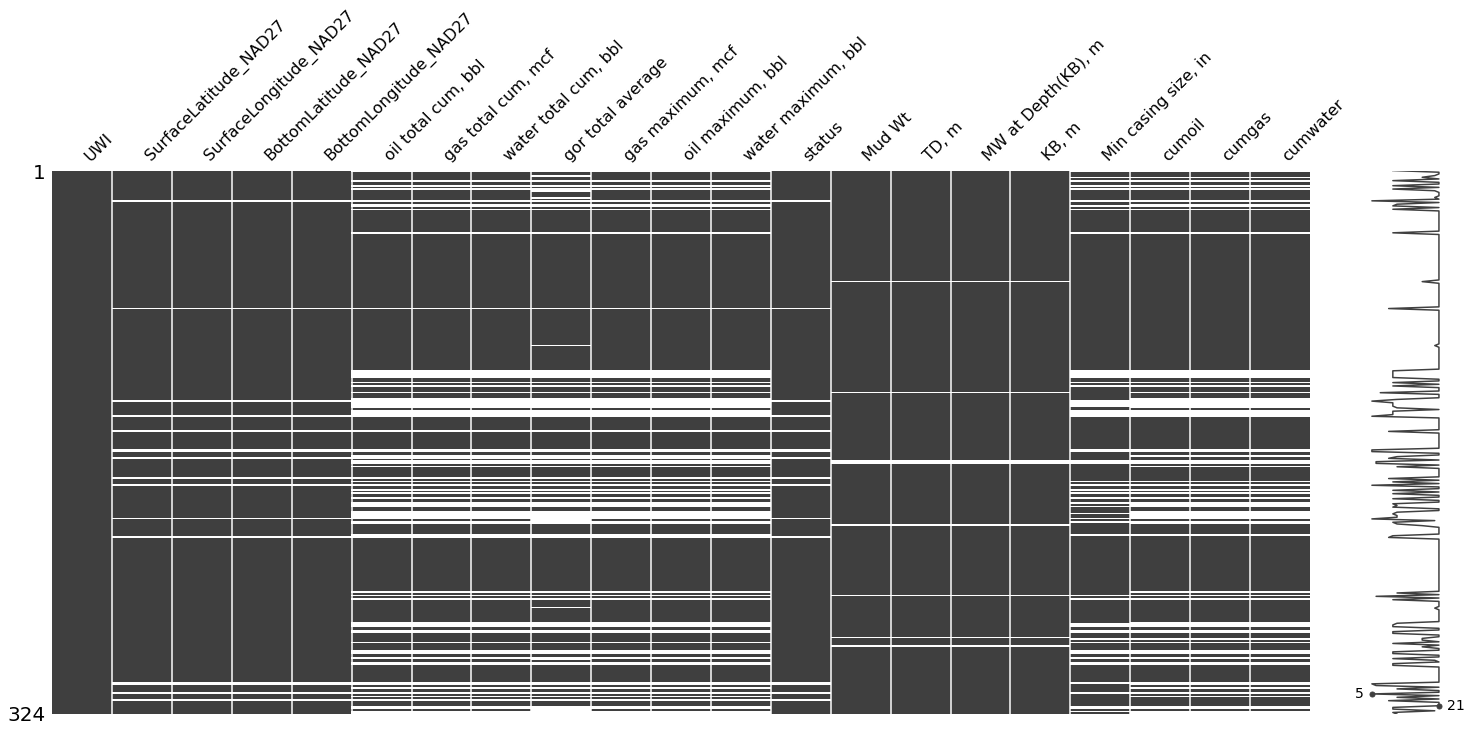

In [33]:
msno.matrix(EB4)

In [34]:
EB4.to_csv('tidy data/Eaglebine Misc.csv', index=False)

## Duvernay DST Pressures

In [35]:
 DV_dst = pd.read_excel("../data/Duvernay/Duvernay DST Pressures SPE May 2 2021.xlsx")

In [36]:
DV_dst.columns.to_list()

['Well ID',
 'KB Elev (m)',
 'DST Number',
 'Formation DSTd',
 'DST Start Depth (TVD) (m)',
 'DST End Depth (TVD) (m)',
 'DST Start Depth (MD) (m)',
 'DST End Depth (MD) (m)',
 'DST Test Date',
 'Test Type',
 'DST Misrun',
 'Misrun Problem Type',
 '1st Valve Open Time',
 '2nd Valve Open Time',
 '3rd Valve Open Time',
 '1st Shut-in Time',
 '2nd Shut-in Time',
 '3rd Shut-in Time',
 'Pressure Recorder Depth (m)',
 'DST Bottom Hole Temp. (degC)',
 'Initial Hydrostatic Pressure (kPa)',
 'Final Hydrostatic Pressure (kPa)',
 '1st Flow Pressure (kPa)',
 '2nd Flow Pressure (kPa)',
 '3rd Flow Pressure (kPa)',
 '1st Shut-in Pressure (kPa)',
 '1st Shut-in Initial Slope',
 '1st Shut-in Final Slope',
 '1st Shut-in Extrapolated Press (kPa)',
 '2nd Shut-in Pressure (kPa)',
 '2nd Shut-in Initial Slope',
 '2nd Shut-in Final Slope',
 '2nd Shut-in Extrapolated Press (kPa)',
 '3rd Shut-in Pressure (kPa)',
 '3rd Shut-in Initial Slope',
 '3rd Shut-in Final Slope',
 '3rd Shut-in Extrapolated Press (kPa)',
 'M

In [42]:
columns = [
        'Well ID',
        'KB Elev (m)',
       'DST Start Depth (TVD) (m)',
       'DST End Depth (TVD) (m)',
       'DST Start Depth (MD) (m)',
       'DST End Depth (MD) (m)',
       'Pressure Recorder Depth (m)',
       'DST Bottom Hole Temp. (degC)',
       'Maximum Shut-in Pressure (kPa)',
       'Final Hydrostatic Pressure (kPa)',
]
DV_dst2 = DV_dst[columns]

col_names = [
            'UWI',
            'KB Elev, m',
            'Start TVD, m',
            'End TVD, m',
            'Start MD, m',
            'End MD, m',
            'Pressure Recorder Depth, m',
            'DST BHT, C',
            'Maximum Shut-in Pressure, kPa',
            'Final Hydrostatic Pressure, kPa',
]

DV_dst2.columns = col_names
DV_dst2.head()

,UWI,"KB Elev, m","Start TVD, m","End TVD, m","Start MD, m","End MD, m","Pressure Recorder Depth, m","DST BHT, C","Maximum Shut-in Pressure, kPa","Final Hydrostatic Pressure, kPa"
0,100010107020W500,701.0,NaN,NaN,1410.6,1423.4,1412.44,48.33,12858.7,15899.31
1,100010608109W500,645.6,NaN,NaN,1686.0,1694.0,1688.20,34.26,10782.0,18137.00
2,100010904012W500,1283.8,NaN,NaN,3602.0,3602.0,3602.00,NaN,47675.0,NaN
3,100011206021W400,651.6,615.0,622.0,615.0,622.0,616.00,NaN,5317.0,6603.00
4,100011506915W500,873.1,NaN,NaN,1801.0,1818.0,1802.00,64.00,13781.0,20357.00


In [46]:
DV_dst2['TVD, m'] = (DV_dst2['End TVD, m'] + DV_dst2['Start TVD, m']) /2 
DV_dst2['MD, m'] = (DV_dst2['End MD, m'] + DV_dst2['Start MD, m']) /2 

<ipython-input-46-8fecdcc75f16>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DV_dst2['TVD, m'] = (DV_dst2['End TVD, m'] + DV_dst2['Start TVD, m']) /2
<ipython-input-46-8fecdcc75f16>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DV_dst2['MD, m'] = (DV_dst2['End MD, m'] + DV_dst2['Start MD, m']) /2


In [47]:
DV_dst2.head()

,UWI,"KB Elev, m","Start TVD, m","End TVD, m","Start MD, m","End MD, m","Pressure Recorder Depth, m","DST BHT, C","Maximum Shut-in Pressure, kPa","Final Hydrostatic Pressure, kPa","TVD, m","MD, m"
0,100010107020W500,701.0,NaN,NaN,1410.6,1423.4,1412.44,48.33,12858.7,15899.31,NaN,1417.0
1,100010608109W500,645.6,NaN,NaN,1686.0,1694.0,1688.20,34.26,10782.0,18137.00,NaN,1690.0
2,100010904012W500,1283.8,NaN,NaN,3602.0,3602.0,3602.00,NaN,47675.0,NaN,NaN,3602.0
3,100011206021W400,651.6,615.0,622.0,615.0,622.0,616.00,NaN,5317.0,6603.00,618.5,618.5
4,100011506915W500,873.1,NaN,NaN,1801.0,1818.0,1802.00,64.00,13781.0,20357.00,NaN,1809.5


In [48]:
DV_dst2.to_csv('tidy data/Duvernay DST Temps.csv')

In [38]:
DV3 = DV2.merge(DV_dst2, on='UWI', how='left')

In [39]:
DV3.to_csv('tidy data/Duvernay Misc.csv', index=False)

<AxesSubplot:>

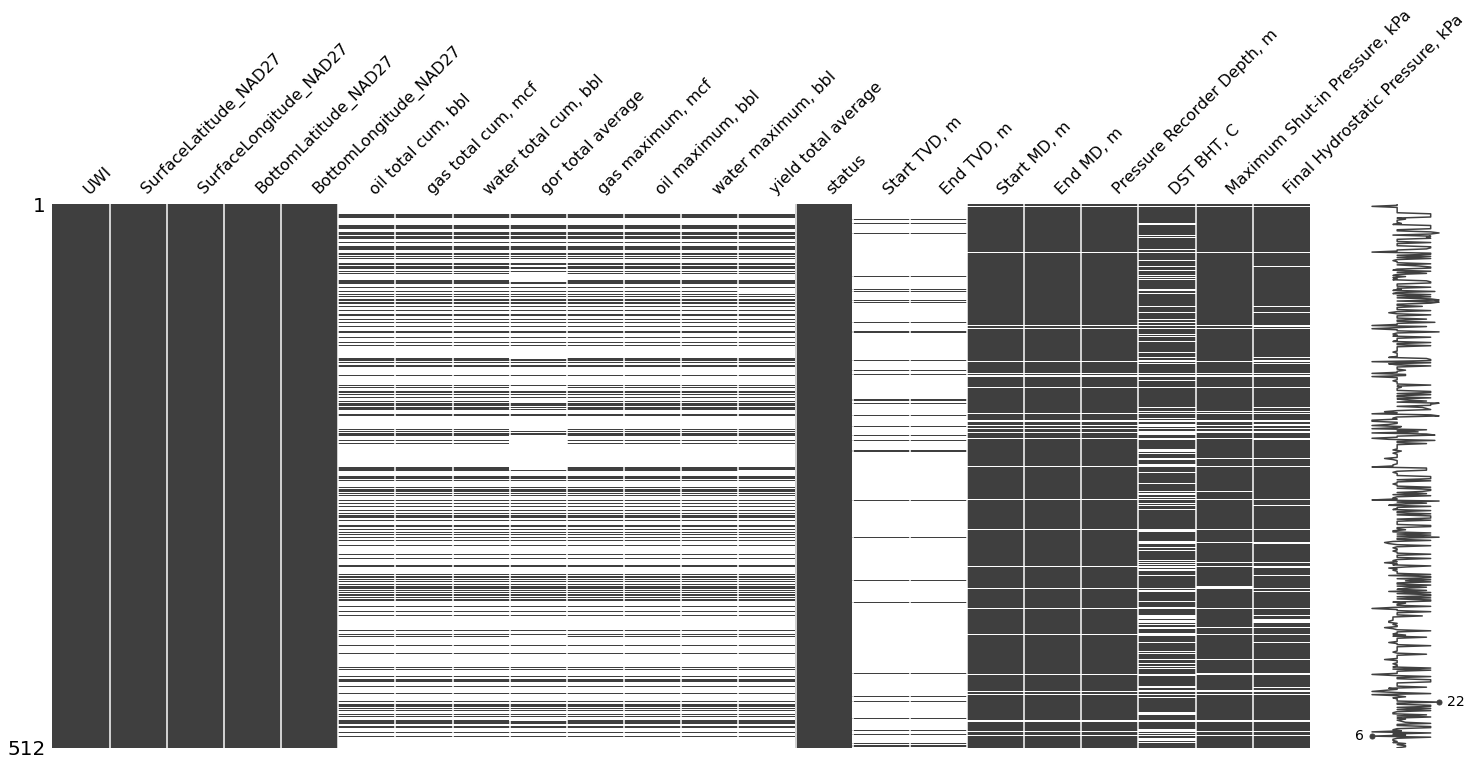

In [40]:
msno.matrix(DV3)